# Ejemplo K-Means

In [1]:
# Importo librerías
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt



In [2]:
# Cargo el dataset Iris
dataset = load_iris()
print('Los tipos de clases que hay en el dataset son: {}'.format(dataset.target_names))


Los tipos de clases que hay en el dataset son: ['setosa' 'versicolor' 'virginica']


In [11]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
# Normalizamos , asegura que todas las características estén en la misma escala, 
# lo que ayuda a que el modelo aprenda de manera más efectiva.
scaler = StandardScaler()
X = scaler.fit_transform(dataset.data)


In [15]:
# Represento los datos originales con sus clases diferenciadas
dfXY = pd.DataFrame(X, columns=dataset.feature_names)
dfXY["target"] = dataset.target

In [8]:
dfXY

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


En este punto se utiliza el método del codo para agrupar los datos X, es decir las variables predictoras pero no la clase de flor. El método del codo consiste en calcular la distancia media de las observaciones a su centroide para una serie de valores de k hasta encontrar un valor que satisfaga que un incremento de k no mejore sustancialmente la distancia media intra-cluster

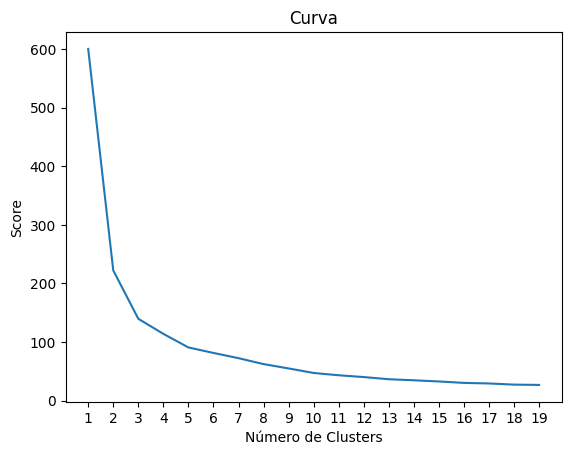

In [21]:

# número de clústers k
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=42) for i in Nc]
#Crea un objeto KMeans con un número específico de clusters (i) y un número de inicializaciones (n_init) igual a 10.
# Esto significa que el algoritmo KMeans intentará encontrar i clusters utilizando 10 configuraciones iniciales aleatorias de centroides.

#(n_init) especifica cuántas veces se ejecutará el algoritmo K-Means con diferentes inicializaciones aleatorias de los centroides.
# Después de cada ejecución, se selecciona el resultado con la menor inercia (suma de las distancias cuadradas de cada punto al centroide de su cluster correspondiente)
# como el resultado final del algoritmo.
kmeans
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva')
plt.xticks(range(1, 20, 1))
plt.show()

In [29]:
# Ajusto el modelo con el mejor parámetro k=3
# Crea un objeto KMeans con un número específico de clusters (3) y un número de inicializaciones (n_init) igual a 10.
# Esto significa que el algoritmo KMeans intentará encontrar i clusters utilizando 10 configuraciones iniciales aleatorias de centroides.

#(n_init) especifica cuántas veces se ejecutará el algoritmo K-Means con diferentes inicializaciones aleatorias de los centroides.
# Después de cada ejecución, se selecciona el resultado con la menor inercia 
# (suma de las distancias cuadradas de cada punto al centroide de su cluster correspondiente)
# como el resultado final del algoritmo.

clf = KMeans(n_clusters=3, n_init=10, random_state=42)

In [27]:
centroides = clf.cluster_centers_
print("Centroides de los clusters:\n", centroides)

Centroides de los clusters:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [28]:
clusters = clf.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

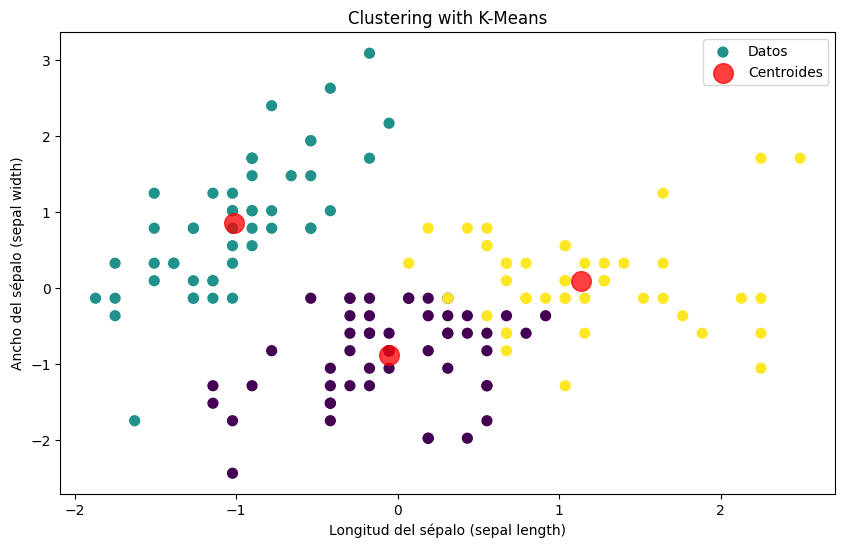

In [31]:
# Predecir los clusters para cada punto en los datos
y_kmeans = clf.predict(X)

# Visualizar los clusters y los centroides
plt.figure(figsize=(10, 6))

# Scatter plot de los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s=50, cmap='viridis', label='Datos')

# Scatter plot de los centroides de los clusters
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.75, label='Centroides')

plt.xlabel('Longitud del sépalo (sepal length)')
plt.ylabel('Ancho del sépalo (sepal width)')

plt.title('Clustering with K-Means')
plt.legend()
plt.show()